Copyright (C) 2017 The HDF Group
 
This example code illustrates how to access and visualize NSIDC
AMSR HDF-EOS5 Point product in Python via OPeNDAP.

If you have any questions, suggestions, or comments on this example, please use the HDF-EOS Forum (http://hdfeos.org/forums).

If you would like to see an example of any other NASA HDF/HDF-EOS data
product that is not listed in the HDF-EOS Comprehensive Examples page
(http://hdfeos.org/zoo), feel free to contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum (http://hdfeos.org/forums).



Tested under: Python 2.7.13 :: Anaconda 4.3.1 (x86_64)

Last updated: 2017-3-13


In [12]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import csv
from urllib3 
import math

Set OPeNDAP URL. NSIDC runs a [Hyrax server that enables CF output](http://n5eil01u.ecs.nsidc.org/opendap/hyrax/AMSA/AU_Land.001/2012.07.23/AMSR_U2_L2_Land_B01_201207232336_D.he5.html) for HDF5 data product. Such server cannot handle compound data type in HDF-EOS5 Point data product. Therefore, we copied a sample file and put it on our demo [Hyrax server that disabled CF Output](https://eosdap.hdfgroup.org:8989/opendap/hyrax/data/NASAFILES/hdf5/AMSR_U2_L2_Land_B01_201207232336_D.he5.html). 

For large subset of data, this code will not work for some reason. Thus, we select 10 points using OPeNDAP's constraint expression. 

Neither PyDAP nor netCDF4 python module can handle OPeNDAP's array of structure.Thus, we will read data in ASCII instead of DAP2.

In [26]:
#url = ("https://eosdap.hdfgroup.org:8989" # Server
    #"/opendap/hyrax/data/NASAFILES/hdf5/" # Path to data on server
    #"AMSR_U2_L2_Land_B01_201207232336_D.he5" # HDF-EOS5 Point file
    #".ascii?" # OPeNDAP request
    #"/HDFEOS/POINTS/AMSR-2%20Level%202%20Land%20Data/Data/" # Group Path
    #"Combined%20NPD%20and%20SCA%20Output%20Fields" # HDF5 Dataset
    #"[3700:1:3709]") # OPeNDAP constraint - select 10 points.

url = "https://data.seaice.uni-bremen.de/amsr2/asi_daygrid_swath/s3125/2014/apr/Amundsen/asi-AMSR2-s3125-20140401-v5.hdf"

http = urllib3.PoolManager()
response = http.request('GET',url)
print(response.status)

cr = csv.reader(response)

# The first line of output is dataset name.
i = 0
# Every 3rd row is the actual value in CSV format.
j = -1
lat = np.array([], dtype=float)
lon = np.array([], dtype=float)
data = np.array([], dtype=float)
for row in cr:
    if i != 0:
        j = j+1
    if i != 0 and (j % 3 == 2):
        # Latitude        
        # print row[1]
        lat = np.append(lat, float(row[1]))
        # Longitude        
        # print row[2] 
        lon = np.append(lon, float(row[2]))
        # SoilMoistureNPD        
        # print row[16]
        data = np.append(data, float(row[16]))
    i = i+1
    
print(lat)
print(lon)

200
[]
[]


Let's plot the data using the above lat/lon/data ASCII values retrieved from OPeNDAP server.

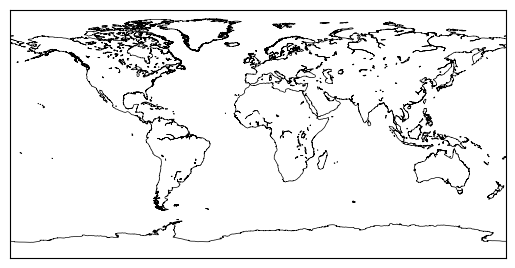

In [19]:
m = Basemap(projection='cyl', resolution='l',
             llcrnrlat=-90, urcrnrlat=90,
             llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.scatter(lon, lat, c=data, s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
fig = plt.gcf()
plt.show()

It's hard to see the data on global map. Let's zoom in.

In [20]:
m = Basemap(projection='cyl', resolution='l',
             llcrnrlat=math.floor(np.min(lat))+5,
             urcrnrlat=math.ceil(np.max(lat))-5,
             llcrnrlon=math.floor(np.min(lon)-5),
             urcrnrlon=math.ceil(np.max(lon))+5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(math.floor(np.min(lat))-5,
                          math.ceil(np.max(lat))+5, 5),
                labels=[True,False,False,False])
m.drawmeridians(np.arange(math.floor(np.min(lon))-5,
                          math.ceil(np.max(lon))+5, 5),
                labels=[False,False,False,True])
m.scatter(lon, lat, c=data, s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
cb = m.colorbar()

basename = 'AMSR_U2_L2_Land_B01_201207232336_D.he5'
plt.title('{0}\n{1}'.format(basename, 'SoilMoistureNPD'))
fig = plt.gcf()
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

You can save it as CSV and visualize data easily with Excel.

In [ ]:
a = np.column_stack((lat, lon, data))
np.savetxt("AMSR_U2_L2.csv", a, delimiter=",")

Here's the Excel 3-D Map image generated from the above CSV file.

![Excel 3-D Map](http://hdfeos.org/example/images/excel/AMSR_U_excel_3d_map.png)